In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [21]:
path = '/home/daisy/FDA_Dataset/inpatient_all_final_1.csv'
df1 = pd.read_csv(path).iloc[:,1:]
df1.drop(columns = ['Veteran flag','Event date','Marital status', 'Marital status encoded',
                    'State','Ruca category'], inplace=True)


path = '/home/daisy/FDA_Dataset/inpatient_all_final_2.csv'
df2 = pd.read_csv(path).iloc[:,1:]
df2.drop(columns = ['Veteran flag','Event date','Marital status', 'Marital status encoded',
                    'State','Ruca category'], inplace=True)

In [22]:
df1_no_miss = df1[df1.isna().any(axis = 1) == False]
df2_no_miss = df2[df2.isna().any(axis = 1) == False]

In [23]:
X_admission = df1_no_miss.drop(columns = ['Readmission','Died'])
Y_admission = df1_no_miss[['Readmission']]

X_mortality = df1_no_miss.drop(columns = ['Readmission','Died'])
Y_mortality = df1_no_miss[['Died']]

In [29]:
X_admission.isna().any(axis = 1).sum()

0

In [30]:
X = X_admission
Y = Y_admission

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.2e+02 s
PCA took 0.43 s
Truncated SVD took 0.32 s


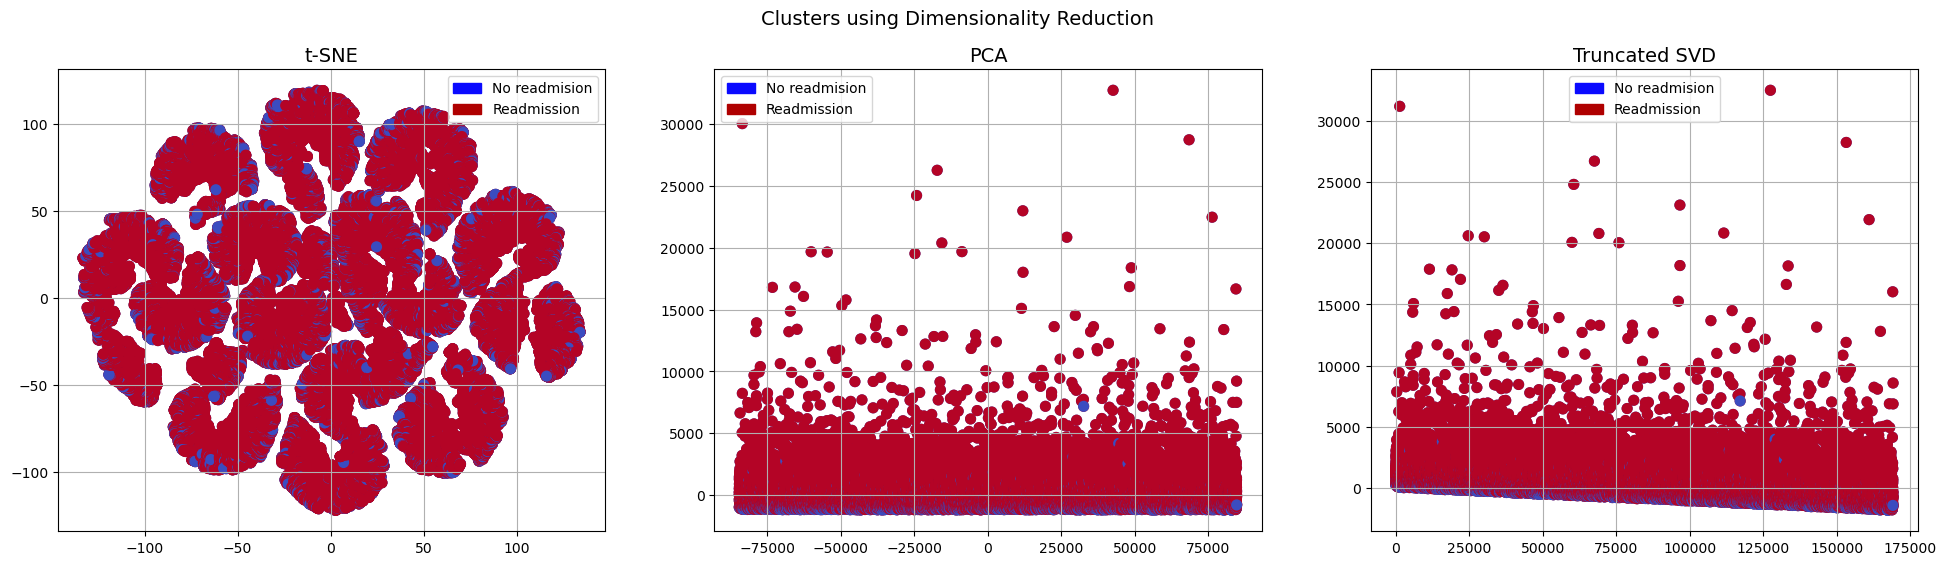

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No readmision')
red_patch = mpatches.Patch(color='#AF0000', label='Readmission')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=([Y == 0]), cmap='coolwarm', label='No readmission', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=([Y == 1]), cmap='coolwarm', label='Readmission', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=([Y == 0]), cmap='coolwarm', label='No readmission', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=([Y == 1]), cmap='coolwarm', label='Readmission', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=([Y == 0]), cmap='coolwarm', label='No readmission', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=([Y == 1]), cmap='coolwarm', label='Readmission', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [38]:
X = X_mortality
Y = Y_mortality

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.2e+02 s
PCA took 0.32 s
Truncated SVD took 0.32 s


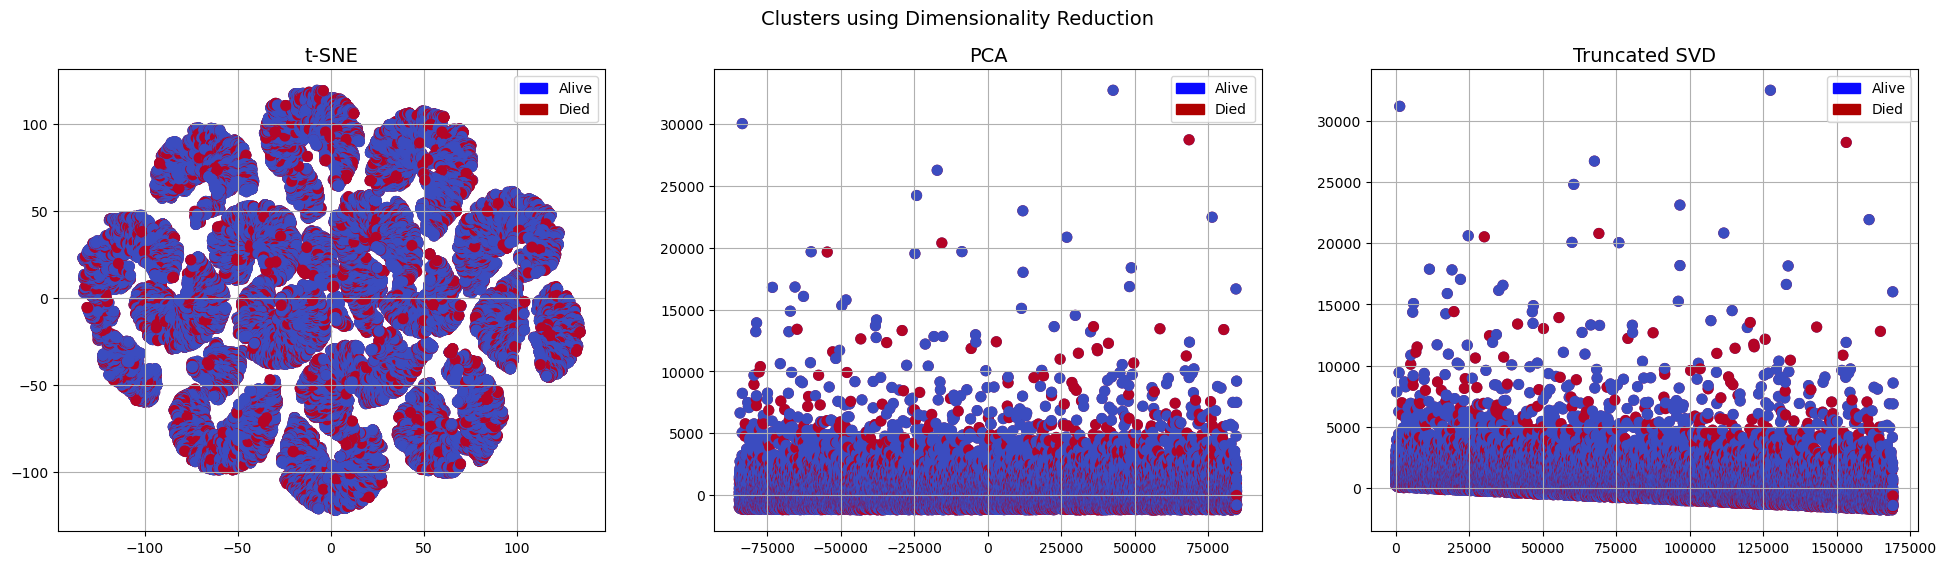

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Alive')
red_patch = mpatches.Patch(color='#AF0000', label='Died')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=([Y == 0]), cmap='coolwarm', label='Alive', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=([Y == 1]), cmap='coolwarm', label='Died', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=([Y == 0]), cmap='coolwarm', label='Alive', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=([Y == 1]), cmap='coolwarm', label='Died', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=([Y == 0]), cmap='coolwarm', label='Alive', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=([Y == 1]), cmap='coolwarm', label='Died', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Feature selection 

In [24]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_admission, Y_admission, test_size=0.20, random_state=42)
X_train_mor, X_test_mor, y_train_mor, y_test_mor = train_test_split(X_mortality, Y_mortality, test_size=0.20, random_state=42)


### Recursive feature elimination with cross validation and rf

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train_ad, y_train_ad)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train_ad.columns[rfecv.support_])

/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: 

Optimal number of features : 3
Best features : Index(['num_stays', 'age_std', 'stay_std'], dtype='object')


/tmp/ipykernel_157236/3561555511.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X_train_ad,y_train_ad)


Feature ranking:
0 num_stays 0.2614354461056666
1 age_std 0.15342660975357875
2 stay_std 0.13460659790237806
3 specialty count 0.08607850559726606
4 unique_admitting_specialty 0.08106182633993102
5 unique_discharging_specialty 0.04778720294326648
6 MEDICINE 0.04363909697342493
7 specialty medical count 0.03935782008896797
8 num_unique_units 0.03303134163006128
9 stay_length 0.01963171576328328
10 Age 60-80 0.019477507708191726
11 stay_min 0.018171303678995204
12 stay_max 0.017970084552453126
13 freq 0.014143885669272029
14 lab_count 0.008206322090960977
15 specialty support count 0.0044080318232385144
16 Age 80-100 0.001798080432482737
17 num_cvd_readmission 0.0017683701050436023
18 Total medications 0.001575407551933183
19 lab_freq 0.001523198067775739
20 Num med per admission min 0.0014914281742776142
21 Age 40-60 0.0013919801980147198
22 stay_mean 0.0011878197600134904
23 age_min 0.0008599860173222451
24 NON-COUNT 0.0006427999051018506
25 period std 0.0005561270914142103
26 Age 60-8

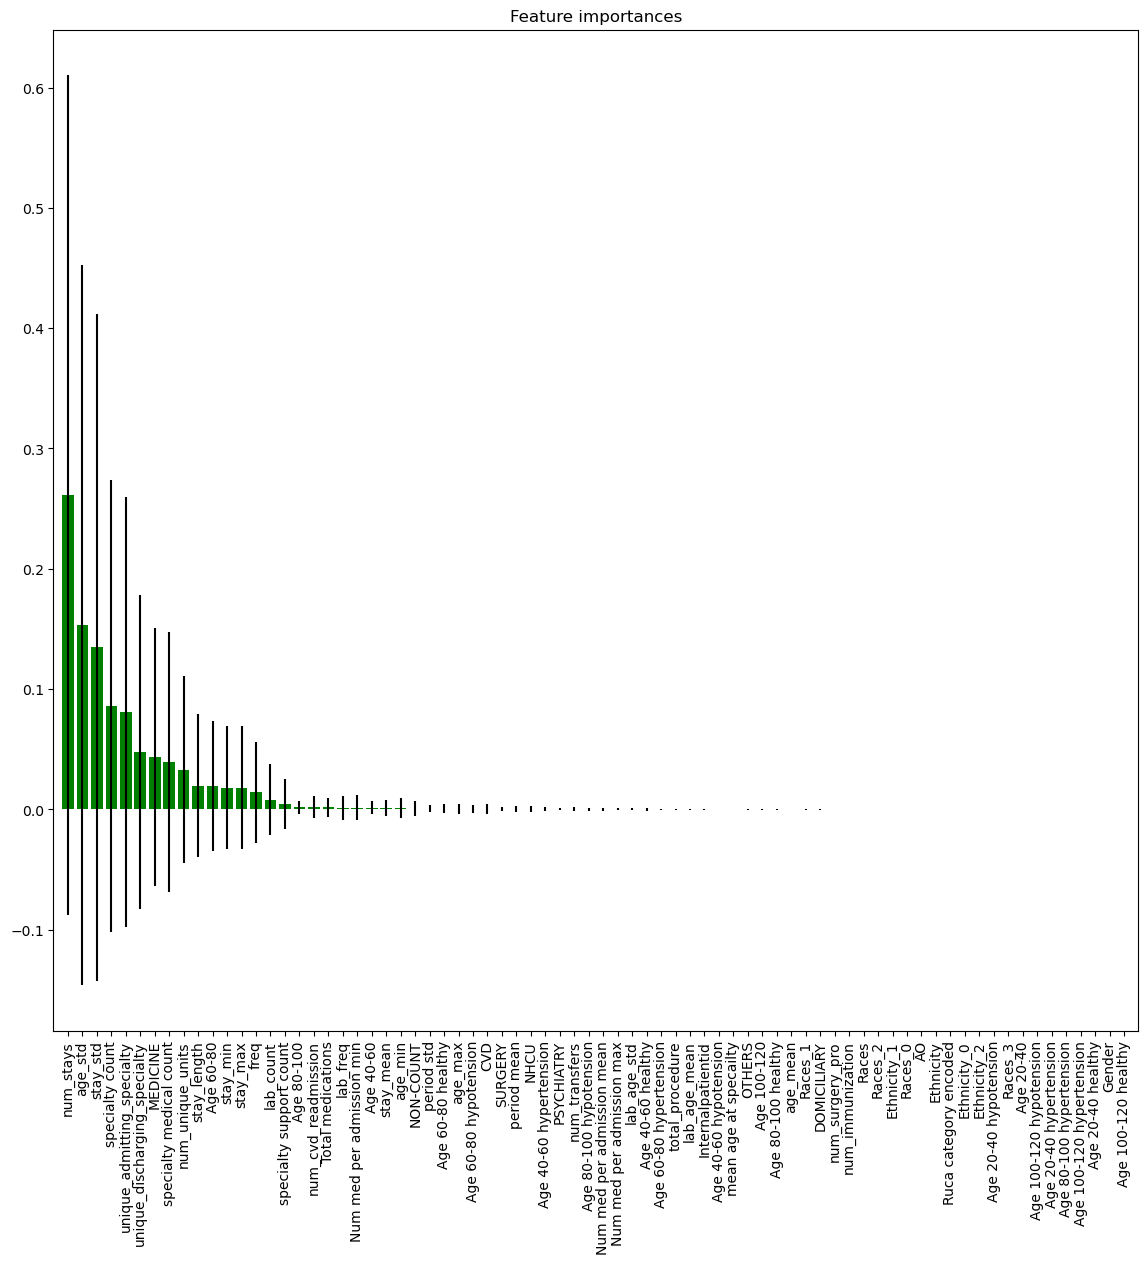

In [7]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train_ad,y_train_ad)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_ad.shape[1]):
    print(f, X_train_ad.columns[indices[f]], importances[indices[f]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train_ad.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train_ad.shape[1]), X_train_ad.columns[indices],rotation=90)
plt.xlim([-1, X_train_ad.shape[1]])
plt.show()

/tmp/ipykernel_157236/37204806.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X_train_mor,y_train_mor)


Feature ranking:
0 NHCU 0.04372755708171498
1 lab_freq 0.03824496816230876
2 period std 0.03706715611820424
3 stay_length 0.03572298382084345
4 stay_mean 0.03351229332348446
5 stay_std 0.03271231997274174
6 period mean 0.03127480241252496
7 Total medications 0.030091520622279967
8 lab_age_std 0.02926840493854188
9 total_procedure 0.027988066072827965
10 Num med per admission mean 0.02731187735854969
11 age_min 0.025465168703468564
12 Internalpatientid 0.02510419774421408
13 mean age at specailty 0.025034343939716056
14 lab_age_mean 0.024739777662175774
15 lab_count 0.024258696156179496
16 age_mean 0.024206621140683504
17 num_immunization 0.023462791767365664
18 age_max 0.02238985167379199
19 age_std 0.02228742991734489
20 stay_min 0.022194441275240662
21 stay_max 0.02179344923635175
22 Age 60-80 hypertension 0.021081068671342285
23 freq 0.020500170579806482
24 Age 60-80 hypotension 0.019047581321197285
25 Num med per admission max 0.018044053728427253
26 Age 60-80 healthy 0.01777311952

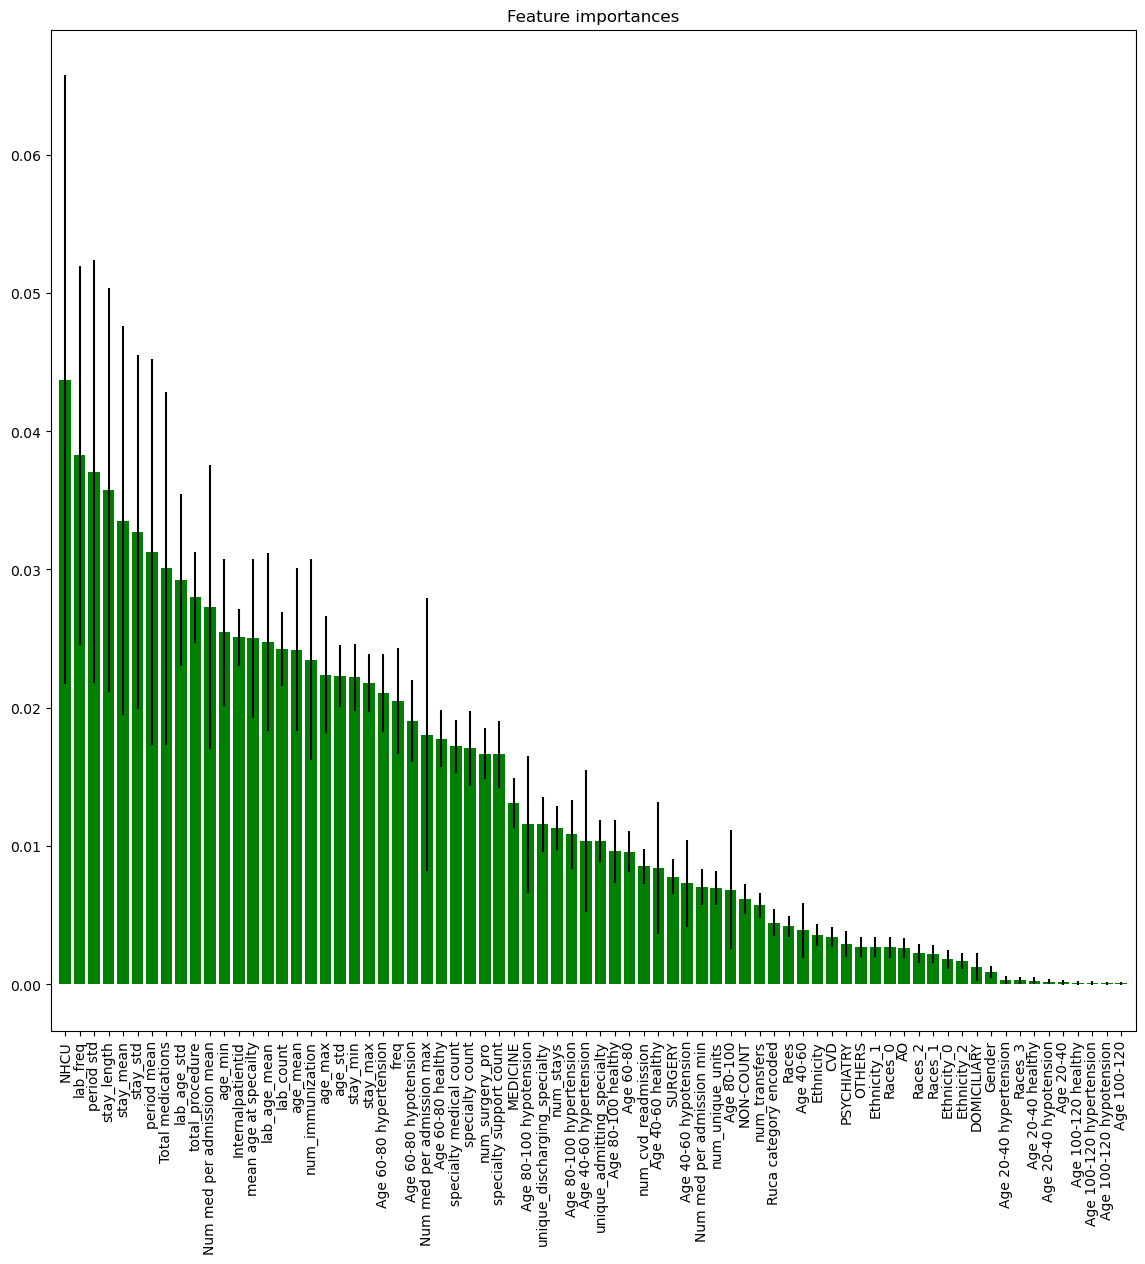

In [8]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train_mor,y_train_mor)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_mor.shape[1]):
    print(f, X_train_mor.columns[indices[f]], importances[indices[f]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train_mor.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train_mor.shape[1]), X_train_mor.columns[indices],rotation=90)
plt.xlim([-1, X_train_mor.shape[1]])
plt.show()

## PCA

Text(0, 0.5, 'explained variance ratio')

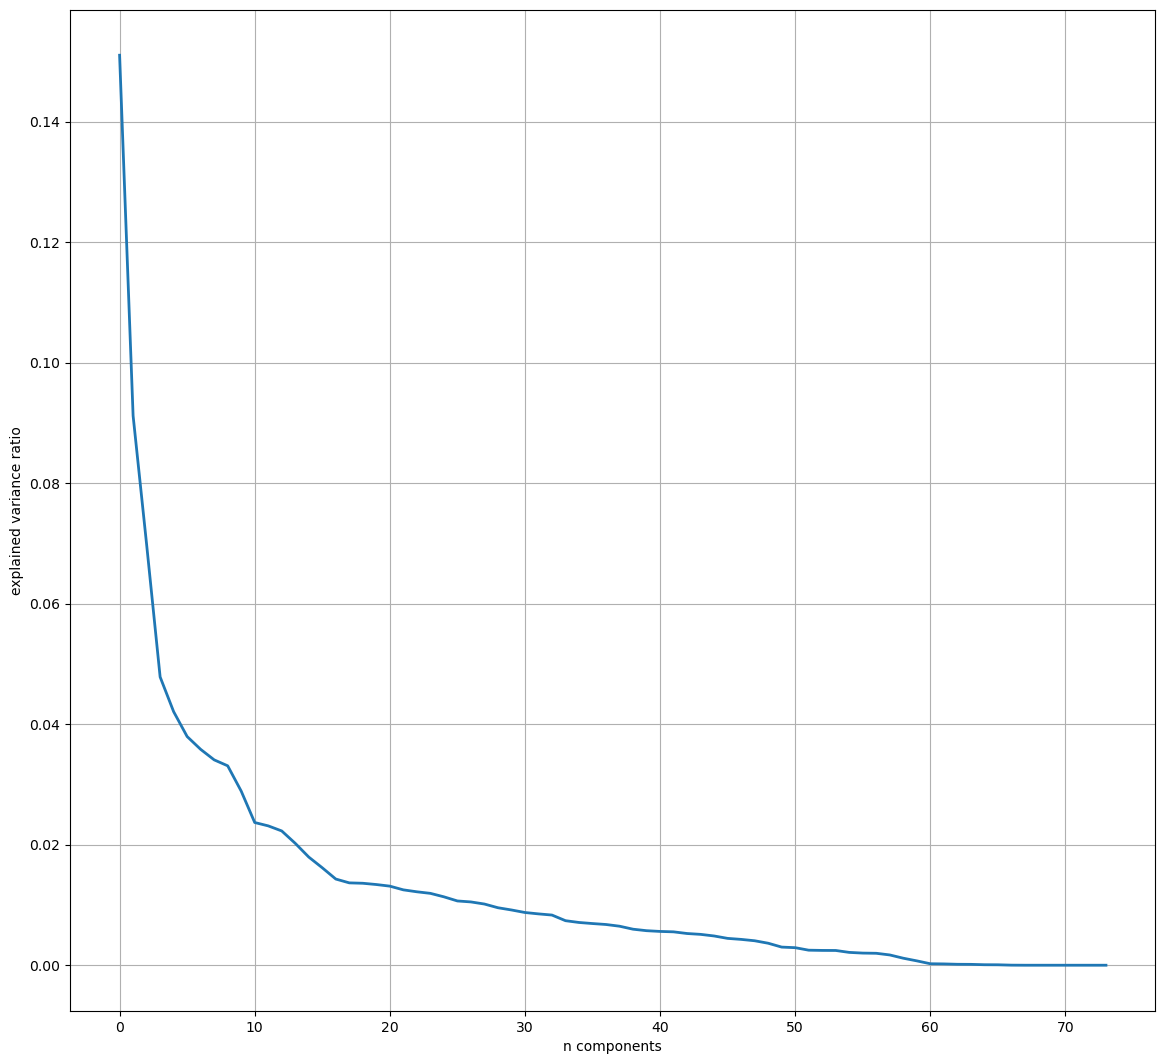

In [30]:
scaler = StandardScaler()
X_train_ad_sc = scaler.fit_transform(X_train_ad)
X_test_ad_sc = scaler.fit_transform(X_test_ad)

from sklearn.decomposition import PCA
# Number of components to keep. if n_components is not set all components are kept:
pca = PCA() 
pca.fit(X_train_ad_sc)

plt.figure(1, figsize=(14, 13))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.grid(True)
plt.xlabel('n components')
plt.ylabel('explained variance ratio')

### PRINCIPLE COMPONENT ANALYSIS (PCA)

Fundemental dimension reduction technique

first step is decorrelation:

rotates data samples to be aligned with axes
shifts data asmples so they have mean zero
no information lost

fit() : learn how to shift samples

transform(): apply the learned transformation. It can also be applies test data

Resulting PCA features are not linearly correlated

Principle components: directions of variance

Text(0, 0.5, 'explained variance ratio')

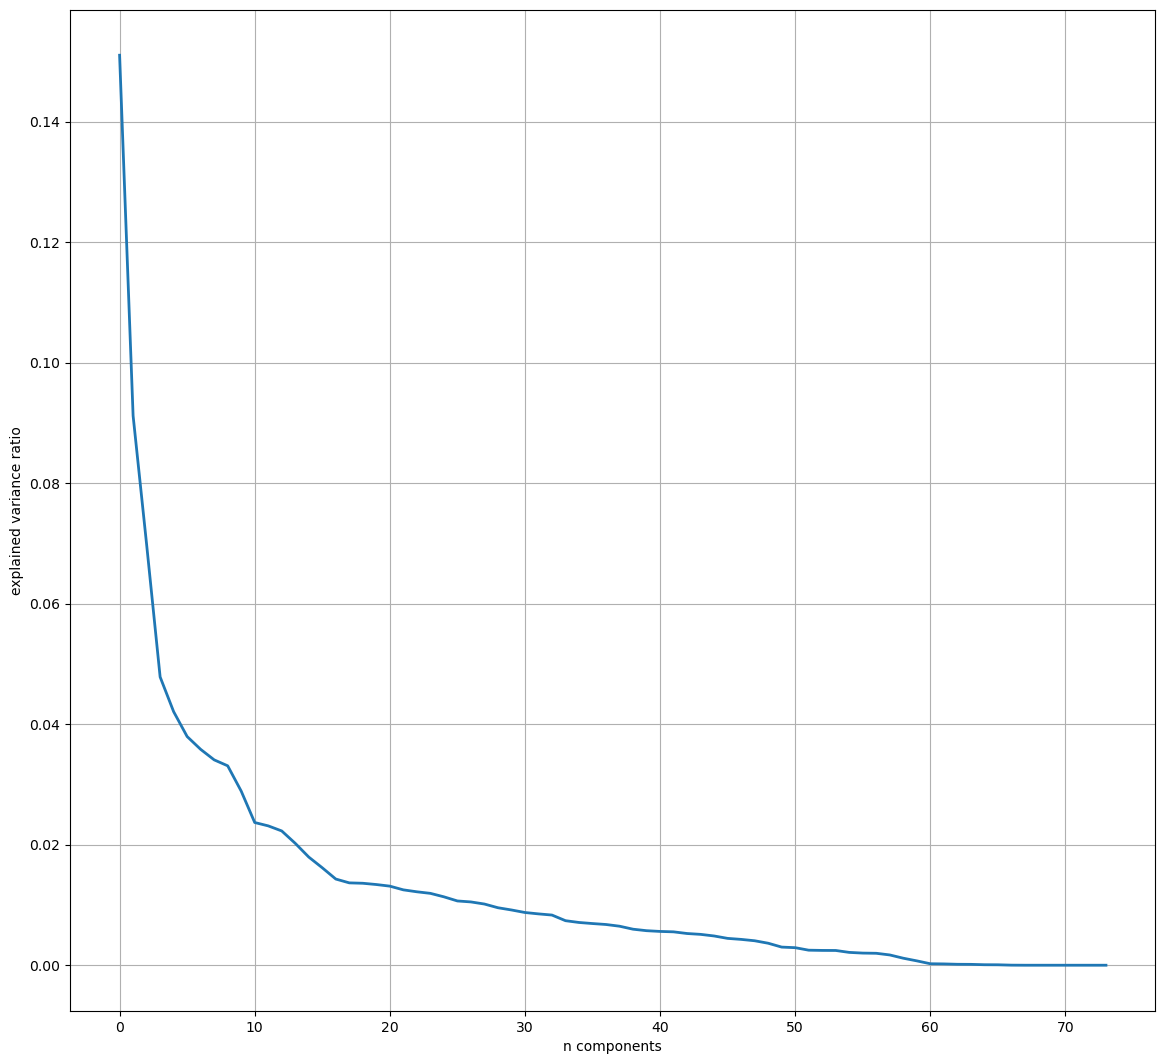

In [31]:
scaler = StandardScaler()
X_train_mor_sc = scaler.fit_transform(X_train_mor)
X_test_mor_sc = scaler.fit_transform(X_test_mor)

from sklearn.decomposition import PCA
# Number of components to keep. if n_components is not set all components are kept:
pca = PCA() 
pca.fit(X_train_mor_sc)

plt.figure(1, figsize=(14, 13))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.grid(True)
plt.xlabel('n components')
# How much each feature impacts the prediction
plt.ylabel('explained variance ratio')

In [34]:
# The components are sorted by decreasing explained_variance_.
print(pca.)

<bound method ClassNamePrefixFeaturesOutMixin.get_feature_names_out of PCA()>
